In [1]:
!gdown 1P742LU5OTXbfFG2F6drbABk1O8UGf4Cd

Downloading...
From: https://drive.google.com/uc?id=1P742LU5OTXbfFG2F6drbABk1O8UGf4Cd
To: /content/dataset.csv
100% 26.7M/26.7M [00:00<00:00, 40.0MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('dataset.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [4]:
# rename column Clean Alternative Fuel Vehicle (CAFV) Eligibility -> CAFV
df.rename(columns={'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'CAFV'}, inplace=True)
# rename col Electric Vehicle Type -> EV Type
df.rename(columns={'Electric Vehicle Type': 'EV Type'}, inplace=True)

## Univariate

In [5]:
(df['Base MSRP'] <= 0).sum()

109122

In [6]:
df['Model Year'].unique()

array([2022, 2013, 2011, 2017, 2019, 2018, 2016, 2020, 2021, 2015, 2014,
       2012, 2023, 2010, 2008, 2000, 1997, 1999, 1998, 2002])

In [7]:
df['Legislative District'].unique()

array([nan, 15., 39., 38.,  1., 21., 10., 40., 22., 13., 20.,  2., 32.,
        7., 46., 30., 35., 44., 14.,  9.,  3., 23., 24.,  5., 33., 45.,
       19., 27., 26., 25., 43., 17.,  6., 41., 37., 34., 31., 12., 28.,
       48., 49.,  4., 29., 36., 42.,  8., 18., 11., 16., 47.])

In [8]:
df['EV Type'].unique()

array(['Plug-in Hybrid Electric Vehicle (PHEV)',
       'Battery Electric Vehicle (BEV)'], dtype=object)

In [9]:
df['EV Type'] = df['EV Type'].replace({
    'Battery Electric Vehicle (BEV)': 'Battery EV',
    'Plug-in Hybrid Electric Vehicle (PHEV)': 'Plug-in Hybrid EV'
})

In [10]:
df['Electric Utility'].unique()

array([nan, 'PACIFICORP', 'PUGET SOUND ENERGY INC',
       'PUD NO 2 OF GRANT COUNTY',
       'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)',
       'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)', 'AVISTA CORP',
       'MODERN ELECTRIC WATER COMPANY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF COWLITZ COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF ELLENSBURG - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF GRAYS HARBOR COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY',
       'BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY',
       'PUD NO 1 OF CHELAN COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||VERA IRRIGATION DISTRICT #15',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||ELMHURST MUTUAL POWER & LIGHT CO|PENINSULA

In [11]:
df['CAFV'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [12]:
df['CAFV'] = df['CAFV'].replace({'Clean Alternative Fuel Vehicle Eligible': 'Eligible',
                                  'Not eligible due to low battery range': 'Not Eligible',
                                  'Eligibility unknown as battery range has not been researched': 'Unknown'})

In [13]:
tmpdf = df.copy()

<Axes: >

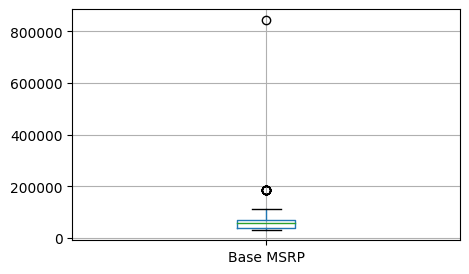

In [14]:
# box plot 'Base MSRP'
tmpdf[tmpdf['Base MSRP'] > 0].boxplot(column=['Base MSRP'], figsize=(5, 3))

In [15]:
basemsrp_nonzero = tmpdf[tmpdf['Base MSRP'] > 0]
q1, q3 = basemsrp_nonzero['Base MSRP'].quantile([0.25, 0.75])
iqr = q3 - q1
lwr_fence = max(basemsrp_nonzero['Base MSRP'].min(), q1-1.5*iqr)
upr_fence = q3+1.5*iqr
print("base msrp:", {
    'median': basemsrp_nonzero['Base MSRP'].median(),
    'min': basemsrp_nonzero['Base MSRP'].min(),
    'max': basemsrp_nonzero['Base MSRP'].max(),
    'lwr_fence': lwr_fence,
    'upr_fence': upr_fence
})

base msrp: {'median': 59900.0, 'min': 31950, 'max': 845000, 'lwr_fence': 31950, 'upr_fence': 114757.5}


In [16]:
# fill 0 (and < 0) values with values b/w lwr and upr fences
tmpdf.loc[tmpdf['Base MSRP'] <= 0, 'Base MSRP'] = np.random.randint(lwr_fence, upr_fence, size=tmpdf[tmpdf['Base MSRP'] <= 0].shape[0])
tmpdf[tmpdf['Base MSRP'] <= 0].shape[0]

0

<Axes: >

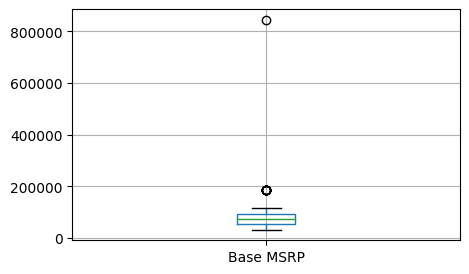

In [17]:
tmpdf.boxplot(column=['Base MSRP'], figsize=(5, 3))

In [18]:
basemsrp_nonzero = tmpdf[tmpdf['Electric Range'] > 0]
q1, q3 = basemsrp_nonzero['Electric Range'].quantile([0.25, 0.75])
iqr = q3 - q1
lwr_fence = max(basemsrp_nonzero['Electric Range'].min(), q1-1.5*iqr)
upr_fence = q3+1.5*iqr
print("electric range:", {
    'median': basemsrp_nonzero['Electric Range'].median(),
    'min': basemsrp_nonzero['Electric Range'].min(),
    'max': basemsrp_nonzero['Electric Range'].max(),
    'lwr_fence': lwr_fence,
    'upr_fence': upr_fence
})

electric range: {'median': 100.0, 'min': 6, 'max': 337, 'lwr_fence': 6, 'upr_fence': 497.5}


<Axes: >

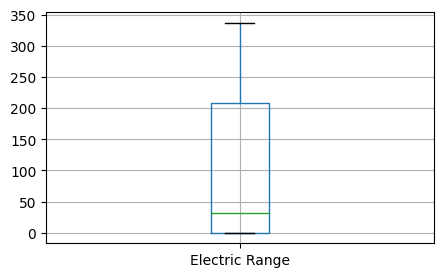

In [19]:
tmpdf.boxplot(column=['Electric Range'], figsize=(5, 3))

In [20]:
# columns that won't be needed
TO_BE_DROPPED = [
    'VIN (1-10)',           # some sort of uid
    'Legislative District', # legislative district code, depends on state
    'DOL Vehicle ID',       # again, some sort of uid
    '2020 Census Tract',    # census tract code
    'Electric Utility'      # won't use
]
tmpdf.drop(columns=TO_BE_DROPPED, inplace=True)

In [21]:
tmpdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   County            112634 non-null  object
 1   City              112634 non-null  object
 2   State             112634 non-null  object
 3   Postal Code       112634 non-null  int64 
 4   Model Year        112634 non-null  int64 
 5   Make              112634 non-null  object
 6   Model             112614 non-null  object
 7   EV Type           112634 non-null  object
 8   CAFV              112634 non-null  object
 9   Electric Range    112634 non-null  int64 
 10  Base MSRP         112634 non-null  int64 
 11  Vehicle Location  112610 non-null  object
dtypes: int64(4), object(8)
memory usage: 10.3+ MB


In [22]:
tmpdf.fillna({'Model': 'Unknown'}, inplace=True)
tmpdf['Model'].isna().sum()

0

In [23]:
# fixing data types
tmpdf['Postal Code'] = tmpdf['Postal Code'].astype(str)
tmpdf['Model Year'] = tmpdf['Model Year'].astype(str)

In [24]:
tmpdf['Vehicle Location'][0]

'POINT (-81.80023 24.5545)'

In [25]:
import re
pattern = r"POINT\s\(-?\d+\.\d+\s-?\d+\.\d+\)"
tmpdf['Vehicle Location'].str.contains(pattern, regex=True).sum()

112610

In [26]:
# fill na in 'Vehicle Location' w/ lat and lon as f"POINT ({lat} {lon}) of Postal Code, City, State of that row
def fill_na_vehicle_location(row):
  if pd.notna(row['Vehicle Location']):
    return row['Vehicle Location']
  else:
    lat = np.random.uniform(30, 50)  # Replace with your desired latitude range
    lon = np.random.uniform(-125, -70) # Replace with your desired longitude range
    return f"POINT ({lat} {lon})"

tmpdf['Vehicle Location'] = tmpdf.apply(fill_na_vehicle_location, axis=1)

In [27]:
import re
pattern = r"POINT\s*\(\s*-?\d+\.\d+\s+-?\d+\.\d+\s*\)"
tmpdf['Vehicle Location'].str.contains(pattern, regex=True).sum()

112634

In [28]:
# split up 'Vehicle Location' into 'Loc Lat' and 'Loc Lon' of float types
def extract_lat_lon(location_str):
    location_str = location_str.replace('POINT (', '')  # replace 'POINT (' with ''
    location_str = location_str.replace(')', '')        # replace ')' with ''
    lat, lon = location_str.split()                     # split on space into lat, lon
    return float(lat), float(lon)

tmpdf[['Loc Lat', 'Loc Lon']] = tmpdf['Vehicle Location'].apply(lambda x: pd.Series(extract_lat_lon(x)))
tmpdf.drop(columns=['Vehicle Location'], inplace=True)

In [29]:
tmpdf.head()

,County,City,State,Postal Code,Model Year,Make,Model,EV Type,CAFV,Electric Range,Base MSRP,Loc Lat,Loc Lon
0,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid EV,Eligible,42,51976,-81.80023,24.55450
1,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid EV,Eligible,38,89480,-114.57245,35.16815
2,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery EV,Eligible,73,47031,-120.50721,46.60448
3,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery EV,Eligible,238,86945,-121.75150,48.53892
4,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid EV,Not Eligible,26,97036,-122.20596,47.97659


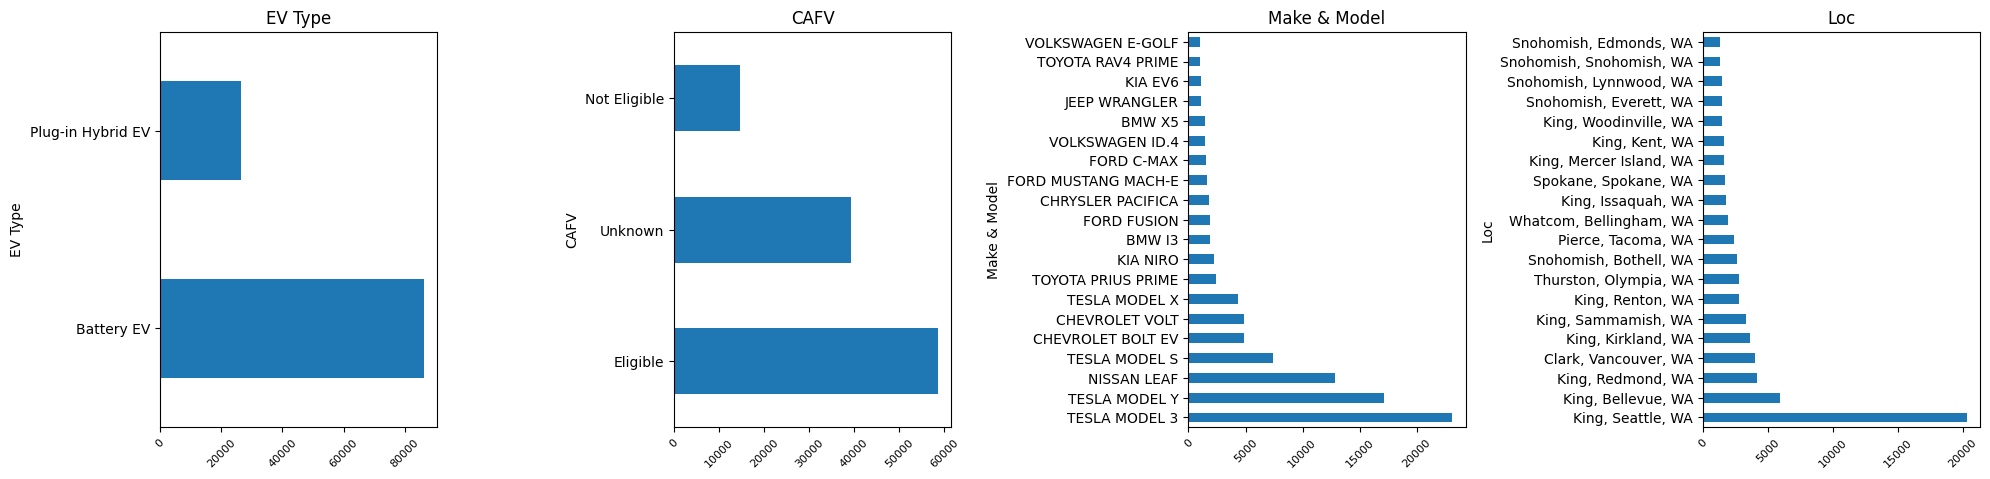

In [30]:
# join Make and Model columns
tmpdef_joined_mk_mod = tmpdf.copy()
tmpdef_joined_mk_mod['Make & Model'] = tmpdef_joined_mk_mod['Make'] + ' ' + tmpdef_joined_mk_mod['Model']
# drop make and model
tmpdef_joined_mk_mod.drop(columns=['Make', 'Model'], inplace=True)
# join County, City, State
tmpdef_joined_mk_mod['Loc'] = tmpdef_joined_mk_mod['County'] + ', ' + tmpdef_joined_mk_mod['City'] + ', ' + tmpdef_joined_mk_mod['State']
# drop County, City, State
tmpdef_joined_mk_mod.drop(columns=['County', 'City', 'State'], inplace=True)
# drop Postal Code, Model Year
tmpdef_joined_mk_mod.drop(columns=['Postal Code', 'Model Year'], inplace=True)
categorical_columns = tmpdef_joined_mk_mod.select_dtypes(include=['object']).columns

num_rows = 2
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 4.5 * num_rows))

for i, column in enumerate(categorical_columns):
    row = i // 4
    col = i % 4
    top_20_values = tmpdef_joined_mk_mod[column].value_counts().head(20)
    ax = axes[row, col]
    top_20_values.plot(kind='barh', ax=ax)
    ax.set_title(column)
    ax.tick_params(axis='x', rotation=45, labelsize=8)

for i in range(len(categorical_columns), num_rows * 4):
    row = i // 4
    col = i % 4
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

- BHEV are more popular
- Overwhelming number of EVs found in the state of Washington
- Seattle, WA has more EVs than any other city
- Popular EV makers include Tesla, Nssan and Chevrolet, w/ Tesla being the leader

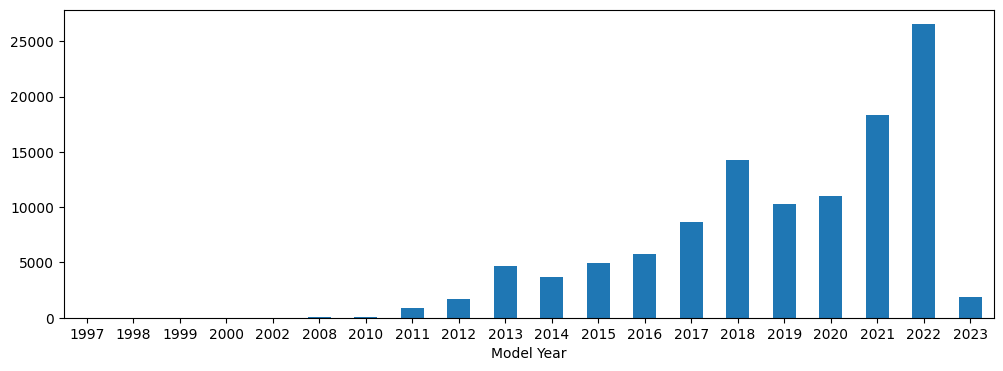

In [31]:
# convert 'Model Year' to numeric for proper sorting
tmpdef_joined_mk_mod['Model Year'] = tmpdf['Model Year']

# group by 'Model Year' and count the number of vehicles
model_year_counts = tmpdef_joined_mk_mod.groupby('Model Year')['Model Year'].count()

# sort the index (years) in ascending order
model_year_counts = model_year_counts.sort_index()

model_year_counts.plot(kind='bar', figsize=(12, 4))
plt.xticks(rotation=0)
plt.show()

- EV usage has risen exponentially over the years

In [32]:
ser = tmpdf['State'].value_counts()
ser[ser > 10]

,count
State,
WA,112348
CA,76
VA,36
MD,26
TX,14


In [33]:
ser = tmpdf['City'].value_counts()
ser[ser > 10]

,count
City,
Seattle,20305
Bellevue,5921
Redmond,4201
Vancouver,4013
Kirkland,3598
...,...
Alexandria,11
Roslyn,11
Shaw Island,11


## Bivariate

<Axes: title={'center': 'Electric Range'}, xlabel='EV Type'>

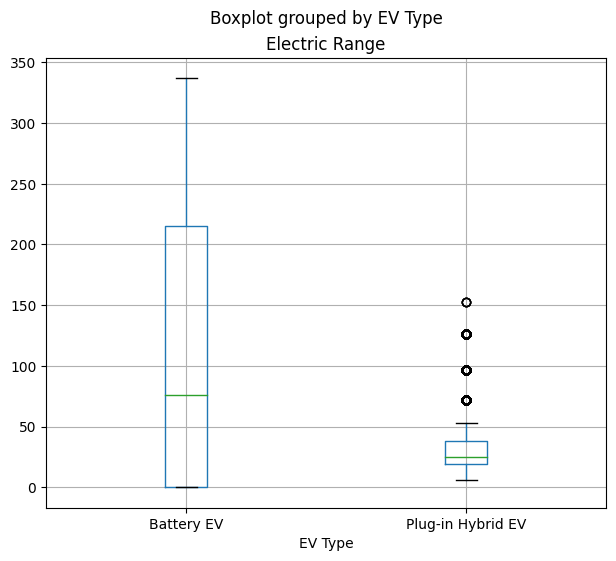

In [34]:
# EV Type v/s Electric Range
tmpdf.boxplot(column=['Electric Range'], by='EV Type', figsize=(7, 6))

- Median range of BEV is higher than PHEV

<Axes: title={'center': 'Base MSRP'}, xlabel='EV Type'>

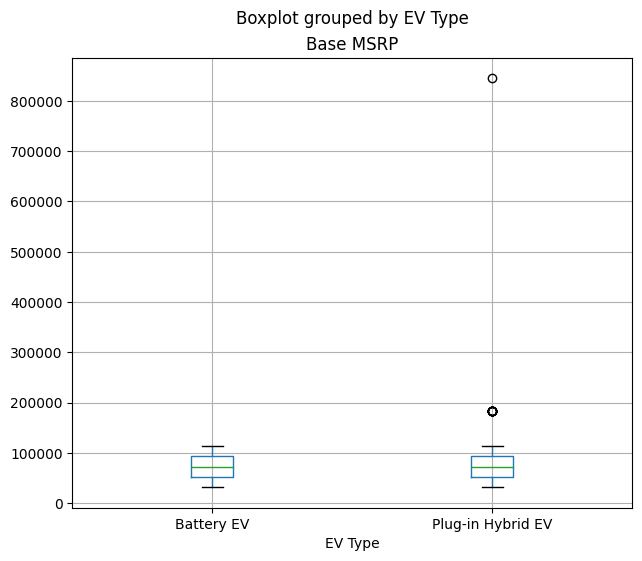

In [35]:
# EV Type v/s 'Base MSRP'
tmpdf.boxplot(column=['Base MSRP'], by='EV Type', figsize=(7, 6))

Nothing conclusive

<Axes: title={'center': 'Electric Range'}, xlabel='City'>

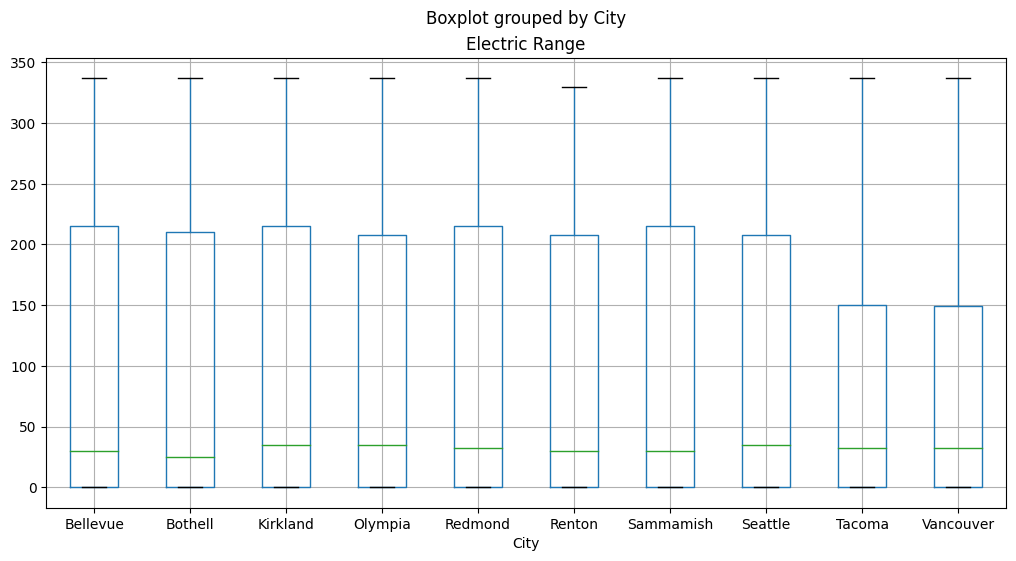

In [36]:
# City v/s 'Electric Range' for top 10 cities
tmpdf['City'].value_counts().head(10).index.tolist()
tmpdf_top_10_cities = tmpdf[tmpdf['City'].isin(tmpdf['City'].value_counts().head(10).index.tolist())]
tmpdf_top_10_cities.boxplot(column=['Electric Range'], by='City', figsize=(12, 6))

<Axes: ylabel='Make'>

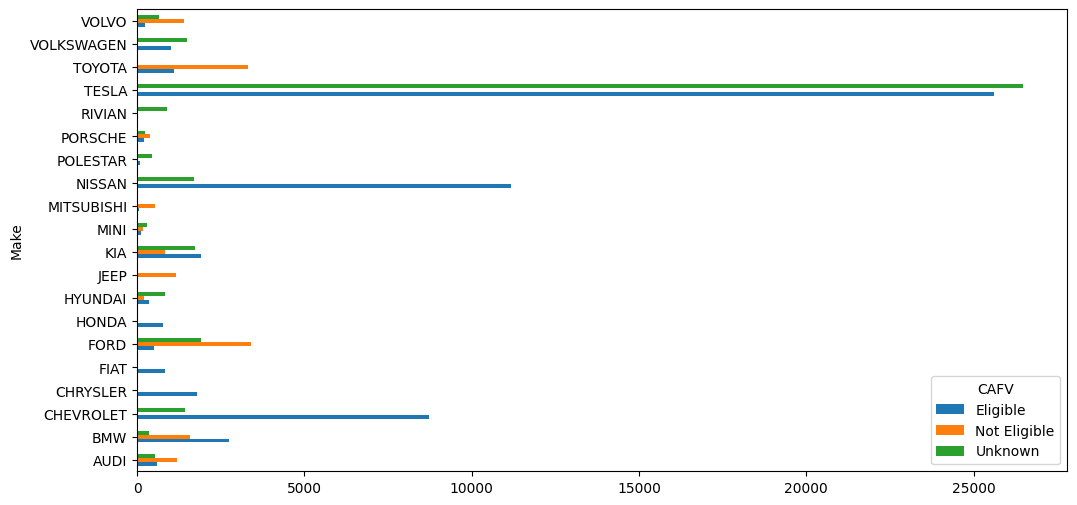

In [37]:
# 'CAFV' v/s top 20 'Make'
top_20_makes = tmpdf['Make'].value_counts().head(20).index.tolist()
tmpdf_top_20_makes = tmpdf[tmpdf['Make'].isin(top_20_makes)]
tmpdf_top_20_makes.groupby(['Make', 'CAFV']).size().unstack().plot(kind='barh', figsize=(12, 6))

<Axes: ylabel='EV Type'>

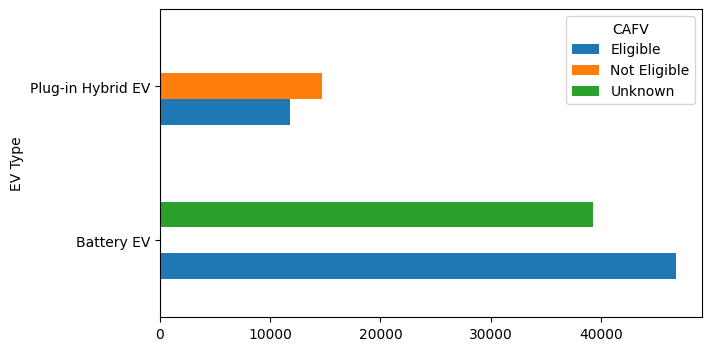

In [38]:
# 'CAFV' v/s 'EV Type'
tmpdf.groupby(['EV Type', 'CAFV']).size().unstack().plot(kind='barh', figsize=(7, 4))

- A large number of non-eligible vehicles are PHEV

<Axes: ylabel='Make'>

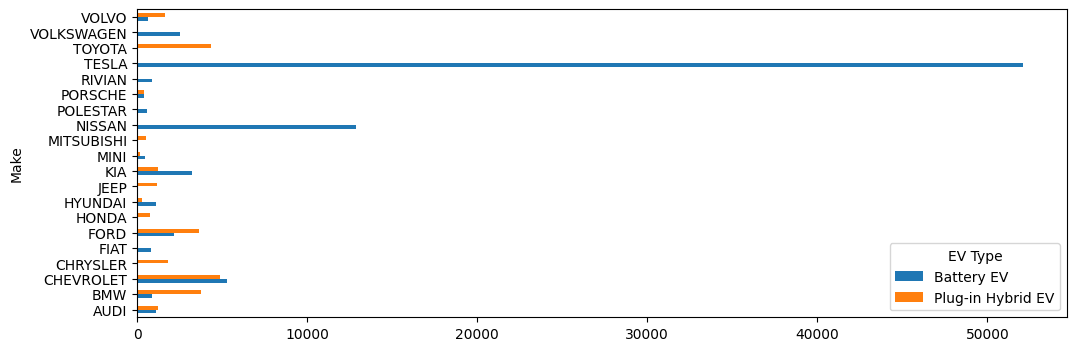

In [39]:
# top 20 'Make' v/s 'EV Type'
top_20_makes = tmpdf['Make'].value_counts().head(20).index.tolist()
tmpdf_top_20_makes = tmpdf[tmpdf['Make'].isin(top_20_makes)]
tmpdf_top_20_makes.groupby(['Make', 'EV Type']).size().unstack().plot(kind='barh', figsize=(12, 4))

<Axes: ylabel='Make'>

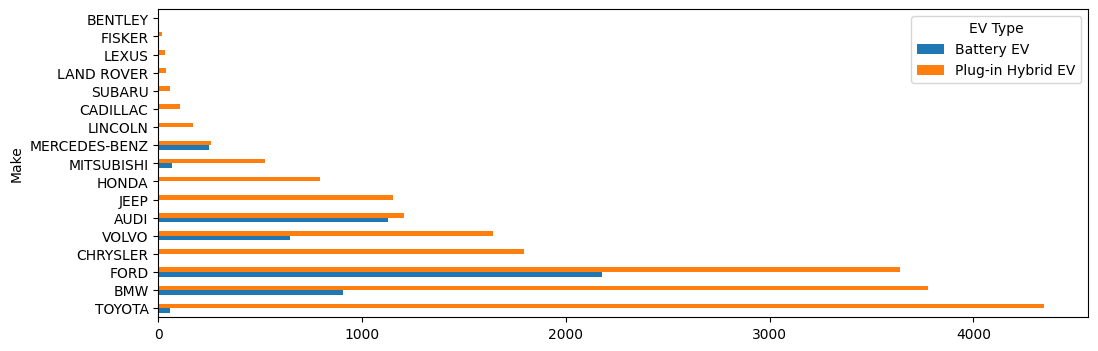

In [40]:
# makers with 'EV Type' having more PHEV than BEV
ev_type_by_make = tmpdf.groupby(['Make', 'EV Type'])['EV Type'].value_counts()
ev_type_by_make = ev_type_by_make.unstack()
ev_type_by_make.fillna(0, inplace=True)
ev_type_by_make.sort_values(by='Plug-in Hybrid EV', ascending=False, inplace=True)
ev_type_by_make[ev_type_by_make['Plug-in Hybrid EV'] > ev_type_by_make['Battery EV']]
# plot barh
ev_type_by_make[ev_type_by_make['Plug-in Hybrid EV'] > ev_type_by_make['Battery EV']].plot(kind='barh', figsize=(12, 4))

- Major makers of PHEVs include Toyota, BMW, Ford, Chrysler, Volvo, etc.
- BMW, Ford, Volvo and Audi also have significant number of BEVs

<Axes: xlabel='Model Year', ylabel='Electric Range'>

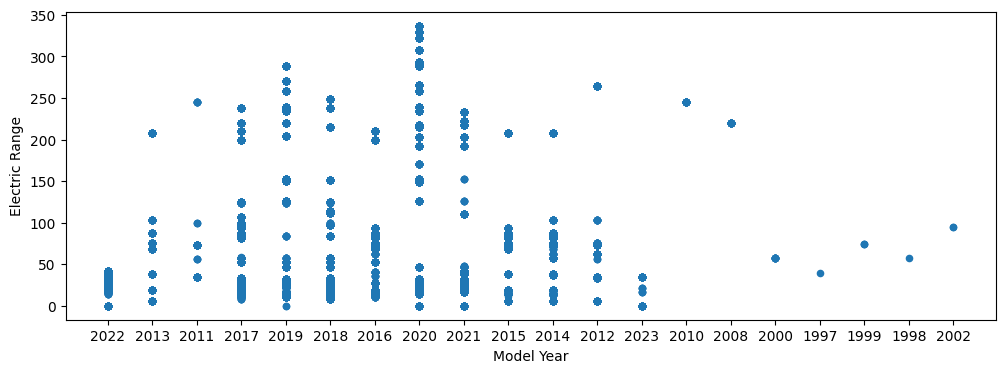

In [41]:
# 'Model Year' v/s 'Range'
tmpdf.plot(x='Model Year', y='Electric Range', kind='scatter', figsize=(12, 4))

In [42]:
import plotly.express as px

In [43]:
state_counts = tmpdf.groupby('State')['State'].count()
state_counts = state_counts.sort_values(ascending=False)
fig = px.choropleth(
    state_counts,
    locations=state_counts.index,
    color=state_counts.values,
    locationmode='USA-states',
    scope='usa',
    title='Animated Choropleth Map',
)
fig.show()

In [55]:
!pip install bar_chart_race

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 2.6 MB/s eta 0:00:00


In [ ]:
import bar_chart_race as bcr

In [59]:
make_counts = tmpdf.groupby(['Model Year', 'Make']).size().unstack(fill_value=0)
make_counts = make_counts.sort_index()
bcr.bar_chart_race(
    df=make_counts,
    filename=None,
    orientation='h',
    sort='desc',
    n_bars=10,
    fixed_max=True,
    title='Major Car Makes',
    period_length=1500,
    filter_column_colors=True
)

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator

